<a href="https://colab.research.google.com/github/AarnoStormborn/Tensorflow-Developer-Certification/blob/main/03_tensorflow_computer_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Sun Dec 11 16:07:57 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   49C    P0    27W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.9.2


# Computer Vision with Tensorflow

## Get the data from Github

In [ ]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2022-12-11 16:07:59--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.12.128, 74.125.200.128, 74.125.68.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.12.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  24.0MB/s    in 5.4s    

2022-12-11 16:08:06 (19.2 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## Inspect the Data

In [ ]:
!ls pizza_steak

test  train


In [ ]:
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [ ]:
import os

for dirpath,dirnames,filenames in os.walk("pizza_steak"):
    print(f"{len(filenames)} images in {dirpath}")

0 images in pizza_steak
0 images in pizza_steak/test
250 images in pizza_steak/test/pizza
250 images in pizza_steak/test/steak
0 images in pizza_steak/train
750 images in pizza_steak/train/pizza
750 images in pizza_steak/train/steak


In [ ]:
import pathlib 
import numpy as np

data_dir = pathlib.Path("pizza_steak/train")
classes = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(classes)

['pizza' 'steak']


In [ ]:
# Visualize the data

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
    # target folder is directory plus class name
    target_folder = target_dir + "/" + target_class

    # Randomly sample an image from the target folder
    random_image = random.sample(os.listdir(target_folder), 1)

    # Read image
    img = mpimg.imread(target_folder + "/" + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis('off')

    print(f"Image shape: {img.shape}")

    return img

Image shape: (509, 512, 3)


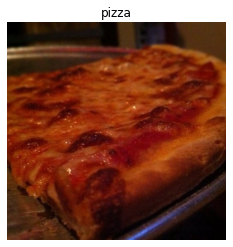

In [ ]:
img = view_random_image(target_dir='pizza_steak/train',
                  target_class='pizza')

In [ ]:
img, img.dtype

(array([[[  1,   1,   1],
         [  1,   1,   1],
         [  1,   1,   1],
         ...,
         [ 85,  48,  21],
         [ 84,  47,  20],
         [ 84,  47,  20]],
 
        [[  1,   1,   1],
         [  1,   1,   1],
         [  1,   1,   1],
         ...,
         [ 85,  48,  21],
         [ 85,  48,  21],
         [ 85,  48,  21]],
 
        [[  1,   1,   1],
         [  1,   1,   1],
         [  1,   1,   1],
         ...,
         [ 85,  48,  21],
         [ 86,  49,  22],
         [ 86,  49,  22]],
 
        ...,
 
        [[100,  60,  25],
         [101,  61,  26],
         [105,  62,  28],
         ...,
         [  2,   0,   1],
         [  2,   0,   1],
         [  2,   0,   1]],
 
        [[101,  61,  25],
         [102,  62,  26],
         [106,  63,  29],
         ...,
         [  2,   0,   3],
         [  2,   0,   3],
         [  2,   0,   3]],
 
        [[100,  60,  24],
         [103,  60,  25],
         [106,  63,  28],
         ...,
         [  2,   0,   3],
  

In [ ]:
tf.constant(img)

<tf.Tensor: shape=(509, 512, 3), dtype=uint8, numpy=
array([[[  1,   1,   1],
        [  1,   1,   1],
        [  1,   1,   1],
        ...,
        [ 85,  48,  21],
        [ 84,  47,  20],
        [ 84,  47,  20]],

       [[  1,   1,   1],
        [  1,   1,   1],
        [  1,   1,   1],
        ...,
        [ 85,  48,  21],
        [ 85,  48,  21],
        [ 85,  48,  21]],

       [[  1,   1,   1],
        [  1,   1,   1],
        [  1,   1,   1],
        ...,
        [ 85,  48,  21],
        [ 86,  49,  22],
        [ 86,  49,  22]],

       ...,

       [[100,  60,  25],
        [101,  61,  26],
        [105,  62,  28],
        ...,
        [  2,   0,   1],
        [  2,   0,   1],
        [  2,   0,   1]],

       [[101,  61,  25],
        [102,  62,  26],
        [106,  63,  29],
        ...,
        [  2,   0,   3],
        [  2,   0,   3],
        [  2,   0,   3]],

       [[100,  60,  24],
        [103,  60,  25],
        [106,  63,  28],
        ...,
        [  2,   0,   

## Normalizing the Image data

In [ ]:
img/255.

array([[[0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        ...,
        [0.33333333, 0.18823529, 0.08235294],
        [0.32941176, 0.18431373, 0.07843137],
        [0.32941176, 0.18431373, 0.07843137]],

       [[0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        ...,
        [0.33333333, 0.18823529, 0.08235294],
        [0.33333333, 0.18823529, 0.08235294],
        [0.33333333, 0.18823529, 0.08235294]],

       [[0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        ...,
        [0.33333333, 0.18823529, 0.08235294],
        [0.3372549 , 0.19215686, 0.08627451],
        [0.3372549 , 0.19215686, 0.08627451]],

       ...,

       [[0.39215686, 0.23529412, 0.09803922],
        [0.39607843, 0.23921569, 0.10196078],
        [0.41176471, 0

## An end-to-end example

* Load our images
* Preprocess our images
* Build a CNN model
* Compile the CNN 
* Fit the CNN to our training data and evaluation 

In [ ]:
# fresh imports
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator as IDG

# set random seed
tf.random.set_seed(40)

# Preprocess data -> Normalization
train_datagen = IDG(rescale=1./255)
valid_datagen = IDG(rescale=1./255)

# Setup paths to our directories
train_dir = "pizza_steak/train"
valid_dir = "pizza_steak/test"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(256,256),
                                               class_mode="binary",
                                               seed=40)

valid_data = valid_datagen.flow_from_directory(directory=valid_dir,
                                              batch_size=32,
                                              target_size=(256,256),
                                              class_mode="binary",
                                              seed=40)

# Build a CNN model
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation='relu',
                           input_shape=(256,256,3)),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding='valid'),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data, 
                        epochs=10,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/10
47/47 [==============================] - 20s 220ms/step - loss: 0.6413 - accuracy: 0.6200 - val_loss: 0.4246 - val_accuracy: 0.8160
Epoch 2/10
47/47 [==============================] - 9s 200ms/step - loss: 0.4719 - accuracy: 0.7947 - val_loss: 0.3827 - val_accuracy: 0.8720
Epoch 3/10
47/47 [==============================] - 9s 201ms/step - loss: 0.4335 - accuracy: 0.8067 - val_loss: 0.3508 - val_accuracy: 0.8400
Epoch 4/10
47/47 [==============================] - 9s 201ms/step - loss: 0.3852 - accuracy: 0.8340 - val_loss: 0.3291 - val_accuracy: 0.8800
Epoch 5/10
47/47 [==============================] - 9s 200ms/step - loss: 0.3351 - accuracy: 0.8700 - val_loss: 0.3165 - val_accuracy: 0.8620
Epoch 6/10
47/47 [==============================] - 9s 201ms/step - loss: 0.3271 - accuracy: 0.8687 - val_loss: 0.2959 - val_accuracy: 0.8780
Epoch 7/10
47/47 [==============================] - 9s 201ms/ste

## Speed up training - Use a GPU

It took **159s** for just one epoch of training. To speed up the process, we use the GPUs provided by Google Colab

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 252, 252, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 126, 126, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 124, 124, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 122, 122, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 61, 61, 10)       0         
 2D)                                                    

## Use an ANN for the same data - Experimentation

In [ ]:
# Set random seed
tf.random.set_seed(40)

# Define the Model
model_2 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=['accuracy'])

# Fit the model
model_2.fit(train_data,
            epochs=10,
            steps_per_epoch=len(train_data),
            validation_data=valid_data,
            validation_steps=len(valid_data))

Epoch 1/10
47/47 [==============================] - 9s 189ms/step - loss: 1.4588 - accuracy: 0.6727 - val_loss: 1.2466 - val_accuracy: 0.5800
Epoch 2/10
47/47 [==============================] - 9s 183ms/step - loss: 0.8888 - accuracy: 0.6813 - val_loss: 0.7686 - val_accuracy: 0.7380
Epoch 3/10
47/47 [==============================] - 9s 183ms/step - loss: 0.9328 - accuracy: 0.7287 - val_loss: 1.3207 - val_accuracy: 0.6820
Epoch 4/10
47/47 [==============================] - 9s 183ms/step - loss: 0.6584 - accuracy: 0.7640 - val_loss: 1.2273 - val_accuracy: 0.5740
Epoch 5/10
47/47 [==============================] - 9s 183ms/step - loss: 0.7024 - accuracy: 0.7680 - val_loss: 0.8476 - val_accuracy: 0.6720
Epoch 6/10
47/47 [==============================] - 9s 182ms/step - loss: 0.3624 - accuracy: 0.8493 - val_loss: 0.9110 - val_accuracy: 0.6460
Epoch 7/10
47/47 [==============================] - 9s 183ms/step - loss: 0.3714 - accuracy: 0.8493 - val_loss: 0.5597 - val_accuracy: 0.7740
Epoch 

In [ ]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, None)              0         
                                                                 
 dense_1 (Dense)             (None, 4)                 786436    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 786,461
Trainable params: 786,461
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Set random seed
tf.random.set_seed(40)

# Define the Model
model_3 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=['accuracy'])

# Fit the model
model_3.fit(train_data,
            epochs=10,
            steps_per_epoch=len(train_data),
            validation_data=valid_data,
            validation_steps=len(valid_data))

Epoch 1/10
47/47 [==============================] - 9s 189ms/step - loss: 3.5809 - accuracy: 0.6773 - val_loss: 0.7604 - val_accuracy: 0.7460
Epoch 2/10
47/47 [==============================] - 8s 181ms/step - loss: 0.6377 - accuracy: 0.7387 - val_loss: 1.7399 - val_accuracy: 0.5200
Epoch 3/10
47/47 [==============================] - 9s 182ms/step - loss: 0.7940 - accuracy: 0.7227 - val_loss: 0.6118 - val_accuracy: 0.7660
Epoch 4/10
47/47 [==============================] - 8s 181ms/step - loss: 0.6668 - accuracy: 0.7620 - val_loss: 0.6850 - val_accuracy: 0.7620
Epoch 5/10
47/47 [==============================] - 9s 182ms/step - loss: 0.5512 - accuracy: 0.7793 - val_loss: 0.6390 - val_accuracy: 0.7380
Epoch 6/10
47/47 [==============================] - 9s 182ms/step - loss: 0.6328 - accuracy: 0.7680 - val_loss: 1.0271 - val_accuracy: 0.6540
Epoch 7/10
47/47 [==============================] - 9s 183ms/step - loss: 0.6415 - accuracy: 0.7627 - val_loss: 0.5455 - val_accuracy: 0.7820
Epoch 

In [ ]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, None)              0         
                                                                 
 dense_4 (Dense)             (None, 32)                6291488   
                                                                 
 dense_5 (Dense)             (None, 16)                528       
                                                                 
 dense_6 (Dense)             (None, 1)                 17        
                                                                 
Total params: 6,292,033
Trainable params: 6,292,033
Non-trainable params: 0
_________________________________________________________________


## Image Binary Classification: Let's break it down

1. Visualize and Explore the Data
2. Preprocess the data
> Use `ImageDataGenerator()` and create datagens\
> Add rescale factor **1/255.**\
> Define train and test directory paths\
> Use `flow_from_directory()` method to read images. It takes:
>> 1. **directory**: path to directory
>> 2. **target_size**: image size (height,width)
>> 3. **class_mode**: "binary" or "multiclass"
>> 4. **batch_size**: Number of images in a batch
3. Build a CNN model (Baseline)
> CNN models use `Conv2D()` and `MaxPool2D()` layers
>> **`Conv2D(filters,kernel_size,strides,padding,activation,input_shape)`**:
>>> 1. **filters**: dimensionality of the output space. The number of feature maps that get created over an image. More the filters, more the number of features extracted. Too many will lead to overfitting
>>> 2. **kernel_size**: how many pixels to cover in one convolution window. int/tuple(int,int). Smaller kernel size will learn more magnified, detailed features and larger sizes will learn more general features.
>>> 3. **strides**: strides of convolution, how many pixels along the dimension to cover, default=1
>>> 4. **padding**: if kernel_size is incompatible with input_shape. set to 'same' to add a layer zeros evenly to all sides of an image. 'valid' for no padding, default='valid'  
If 'valid', then the output shape is compressed, else 'same', output shape remains the same
>>> 5. **activation**: activation function, default=None
>>> 6. **input_shape**: input shape of image (height, width, color channels) (First Layer Only)
>> **`Flatten()`**: Use this function to fit the features along one axis, this is required for the Dense Output Layer

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create data generators and apply preprocessing
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Define directory paths
train_dir = "/content/pizza_steak/train"
test_dir = "/content/pizza_steak/test"

# Load the data using data generators
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(256,256),
                                               class_mode="binary",
                                               batch_size=32)
test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(256,256),
                                             class_mode="binary",
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
# Check a sample batch
images, labels = train_data.next()
len(images), len(labels)

(32, 32)

In [ ]:
# How many batches ?
len(train_data)

47

In [ ]:
47*32

1504

In [ ]:
# Get an image tensor and its shape
images[0], images[0].shape

(array([[[0.6666667 , 0.6745098 , 0.72156864],
         [0.627451  , 0.61960787, 0.6627451 ],
         [0.54509807, 0.5058824 , 0.5411765 ],
         ...,
         [0.21568629, 0.12941177, 0.07843138],
         [0.21960786, 0.13333334, 0.08235294],
         [0.20784315, 0.13333334, 0.07843138]],
 
        [[0.6117647 , 0.61960787, 0.67058825],
         [0.61960787, 0.6117647 , 0.6627451 ],
         [0.5176471 , 0.48627454, 0.5294118 ],
         ...,
         [0.20392159, 0.12941177, 0.07450981],
         [0.19607845, 0.12156864, 0.06666667],
         [0.18823531, 0.1137255 , 0.05882353]],
 
        [[0.58431375, 0.5803922 , 0.6431373 ],
         [0.5921569 , 0.5764706 , 0.63529414],
         [0.5058824 , 0.47450984, 0.5254902 ],
         ...,
         [0.20392159, 0.13333334, 0.07843138],
         [0.21176472, 0.14901961, 0.09019608],
         [0.21960786, 0.15686275, 0.09803922]],
 
        ...,
 
        [[0.8941177 , 0.69411767, 0.44705886],
         [0.8862746 , 0.6862745 , 0.43921

In [ ]:
# View labels
labels

array([0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1.,
       1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 0., 0.],
      dtype=float32)

### Create a CNN model (Baseline)

In [ ]:
# Start with a simple model

from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.models import Sequential

In [ ]:
model_4 = Sequential([
    Conv2D(filters=10,
           kernel_size=3,
           strides=1, # default
           padding='valid', # deafult
           activation='relu',
           input_shape=(256,256,3)), # only needed in first layer
    Conv2D(filters=10, kernel_size=3, activation='relu'),
    Conv2D(10, 3, activation='relu'),
    Flatten(),
    Dense(1, activation='sigmoid')
    ])

In [ ]:
# Compile the Model
model_4.compile(loss=BinaryCrossentropy(),
                optimizer=Adam(),
                metrics=["accuracy"])

In [ ]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 254, 254, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 252, 252, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 250, 250, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 625000)            0         
                                                                 
 dense_7 (Dense)             (None, 1)                 625001    
                                                                 
Total params: 627,101
Trainable params: 627,101
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Fit the model
len(train_data), len(test_data)

(47, 16)

In [ ]:
history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 11s 211ms/step - loss: 0.8374 - accuracy: 0.6520 - val_loss: 0.4153 - val_accuracy: 0.8280
Epoch 2/5
47/47 [==============================] - 10s 209ms/step - loss: 0.4163 - accuracy: 0.8213 - val_loss: 0.4023 - val_accuracy: 0.8240
Epoch 3/5
47/47 [==============================] - 10s 202ms/step - loss: 0.2909 - accuracy: 0.8913 - val_loss: 0.3614 - val_accuracy: 0.8400
Epoch 4/5
47/47 [==============================] - 10s 203ms/step - loss: 0.1878 - accuracy: 0.9393 - val_loss: 0.4276 - val_accuracy: 0.8140
Epoch 5/5
47/47 [==============================] - 9s 201ms/step - loss: 0.0885 - accuracy: 0.9767 - val_loss: 0.4227 - val_accuracy: 0.8300


In [ ]:
model_1.evaluate(test_data)

16/16 [==============================] - 2s 139ms/step - loss: 0.3716 - accuracy: 0.8660


[0.3716415464878082, 0.8659999966621399]

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 252, 252, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 126, 126, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 124, 124, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 122, 122, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 61, 61, 10)       0         
 2D)                                                    

In [ ]:
model_4.evaluate(test_data)

16/16 [==============================] - 2s 142ms/step - loss: 0.4227 - accuracy: 0.8300


[0.4226880371570587, 0.8299999833106995]

In [ ]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 254, 254, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 252, 252, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 250, 250, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 625000)            0         
                                                                 
 dense_7 (Dense)             (None, 1)                 625001    
                                                                 
Total params: 627,101
Trainable params: 627,101
Non-trainable params: 0
_________________________________________________________________


### Evaluate the Baseline Model

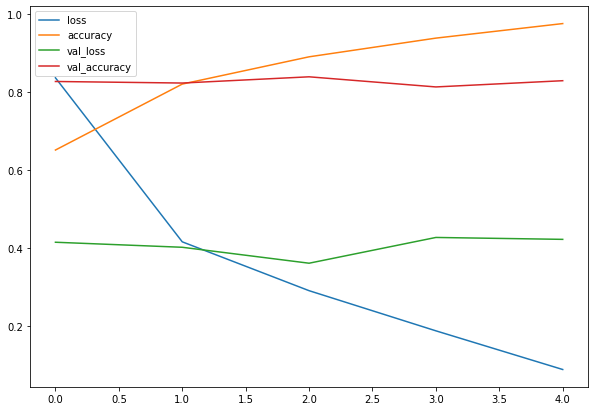

In [ ]:
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10,7))

In [ ]:
def plot_curves(history):

    """
    Returns separate loss and accuracy curves
    """

    loss = history.history["loss"]
    val_loss = history.history["val_loss"]

    accuracy = history.history["accuracy"]
    val_accuracy = history.history["val_accuracy"]

    epochs = range(len(history.history["loss"]))

    plt.plot(epochs, loss, label="training_loss")
    plt.plot(epochs, val_loss, label="val_loss")
    plt.title("loss")
    plt.xlabel("epochs")
    plt.legend()

    plt.figure()
    plt.plot(epochs, accuracy, label="training_accuracy")
    plt.plot(epochs, val_accuracy, label="val_accuracy")
    plt.title("accuracy")
    plt.xlabel("epochs")
    plt.legend()

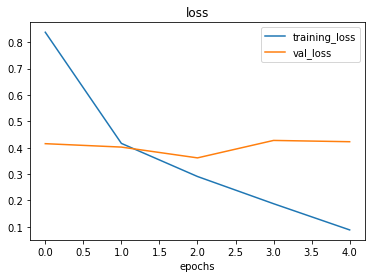

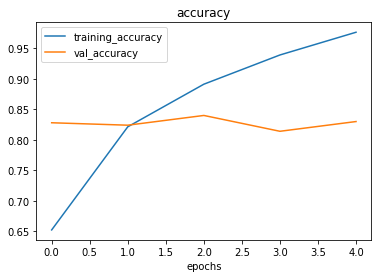

In [ ]:
plot_curves(history_4)

### Dealing with Overfitting

Reduce Overfitting
* Add data augmentation
* Add regularization layers
* Add more data...

In [ ]:
# Create a new model with MaxPool layers

model_5 = Sequential([
    Conv2D(10,3,activation='relu', input_shape=(256,256,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(pool_size=2),
    Flatten(),
    Dense(1, activation='sigmoid')
])

In [ ]:
# Compile the Model
model_5.compile(loss=BinaryCrossentropy(),
                optimizer=Adam(),
                metrics=["accuracy"])

In [ ]:
# Fit the model
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 196ms/step - loss: 0.3828 - accuracy: 0.8307 - val_loss: 0.3308 - val_accuracy: 0.8680
Epoch 2/5
47/47 [==============================] - 9s 200ms/step - loss: 0.3613 - accuracy: 0.8507 - val_loss: 0.3073 - val_accuracy: 0.8760
Epoch 3/5
47/47 [==============================] - 9s 190ms/step - loss: 0.3543 - accuracy: 0.8487 - val_loss: 0.3087 - val_accuracy: 0.8760
Epoch 4/5
47/47 [==============================] - 9s 191ms/step - loss: 0.3138 - accuracy: 0.8713 - val_loss: 0.2927 - val_accuracy: 0.8760
Epoch 5/5
47/47 [==============================] - 9s 189ms/step - loss: 0.3154 - accuracy: 0.8787 - val_loss: 0.3183 - val_accuracy: 0.8780


In [ ]:
model_5.summary() # Pay attention to the shapes

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 254, 254, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 127, 127, 10)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 125, 125, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 62, 62, 10)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 60, 60, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 30, 30, 10)      

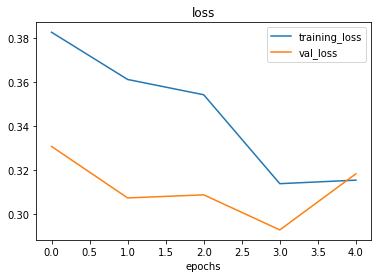

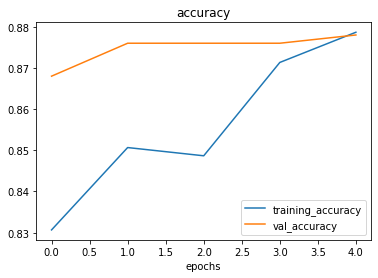

In [ ]:
plot_curves(history_5)

### Data Augmentation

In [ ]:
# Create datagens again with data augmentation

train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.3,
                                             horizontal_flip=True)

# Datagens without augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)